# TensorFlow Datasets API 활용법

- TensorFlow Datasets 는 다양한 데이터셋을 TensorFlow에서 활용하기 쉽도록 제공
- 굉장히 많고, 다양한 데이터셋이 학습하기 편한 형태로 제공 되기 때문에, 간단한 사용법만 알아두어도, 샘플로 모델을 돌려보고 학습하기에 매우 유용

## 텐서플로우 가이드를 살펴보시면, 세부 예제와 함께 소스코드를 제공

- TensorFlow Datasets Github : https://github.com/tensorflow/datasets
- TensorFlow Datasets 가이드 : https://www.tensorflow.org/datasets/overview

## TensorFlow Datasets 라이브러리 설치

- TFDS는 두 가지 패키지로 존재

    - pip install tensorflow-datasets : 몇 개월마다 릴리스되는 안정적인 버전 
    - pip install tfds-nightly : 매일 릴리스되며 데이터 세트의 마지막 버전

In [3]:
import tensorflow_datasets as tfds

In [4]:
tfds.__version__

'4.7.0'

# 필요한 library import

In [5]:
import tensorflow_datasets as tfds
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# list_builders: 데이터셋 종류 확인
datasets 각각에 대한 도큐먼트 : https://www.tensorflow.org/datasets/catalog/overview

In [6]:
tfds.list_builders()[:10]

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence']

# info: 데이터셋의 정보 확인

In [7]:
dataset, info = tfds.load(name='horses_or_humans', split=tfds.Split.TRAIN, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]
Generating splits...:   0%|                                        | 0/2 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 311 examples [00:00, 3079.21 examples/s]
Generating train examples...: 619 examples [00:00, 2593.49 examples/s]
Generating train examples...: 884 examples [00:00, 2183.54 examples/s]
                                                                      
Shuffling C:\Users\khkim\tensorflow_datasets\horses_or_humans\3.0.0.incompleteRGXHBQ\horses_or
Shuffling C:\Users\khkim\tensorflow_datasets\horses_or_humans\3.0.0.incompleteRGXHBQ\horses_or
Shuffling C:\Users\khkim\tensorflow_datasets\horses_or_humans\3.0.0.incompleteRGXHBQ\horses_or
Generating splits...:  50%|████████████████                | 1/2 [00:00<00:00,  1.30 splits/s]
Generating test examples...: 0 examples [00:00, ? examples/s]
                                                             
Shuffling C:\U

Dataset horses_or_humans downloaded and prepared to C:\Users\khkim\tensorflow_datasets\horses_or_humans\3.0.0. Subsequent calls will reuse this data.


- info 에서 데이터셋의 크기를 제공
- 이 정보를 활용하여 나중에 steps_per_epoch에 지정해 주어야할 값을 손쉽게 계산할 수 있음

In [8]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='C:\\Users\\khkim\\tensorflow_datasets\\horses_or_humans\\3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
  

In [9]:
# info.splits에 train/test의 샘플 사이즈를 제공합니다.
info.splits

{Split('train'): <SplitInfo num_examples=1027, num_shards=2>,
 Split('test'): <SplitInfo num_examples=256, num_shards=1>}

In [10]:
train_size = info.splits['train'].num_examples
test_size = info.splits['test'].num_examples

In [11]:
print('train_size: {} 개\ntest_size: {} 개'.format(train_size, test_size))

train_size: 1027 개
test_size: 256 개


# load : 데이터셋 로드

In [12]:
train_dataset = tfds.load(name="horses_or_humans", split=tfds.Split.TRAIN)

Label: 0


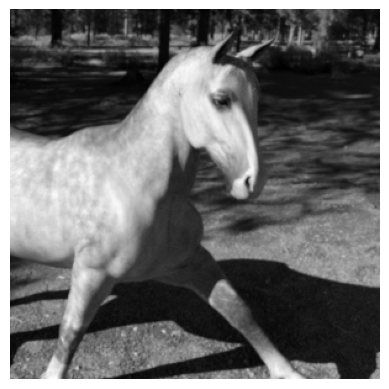

In [13]:
for data in train_dataset.take(1):
    image, label = data['image'], data['label']
    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    plt.axis('off')
    print("Label: %d" % label.numpy())

test dataset도 마찬가지로 split=tfds.Split.TEST 만 지정해 주면 로드됨

In [14]:
test_dataset = tfds.load("horses_or_humans", split=tfds.Split.TEST)

Label: 0


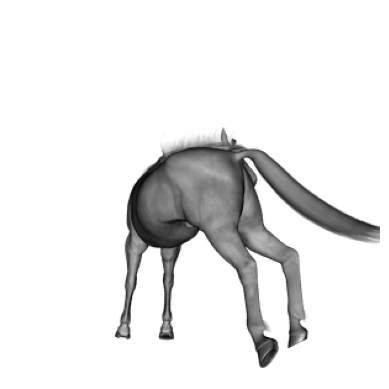

In [15]:
for data in test_dataset.take(1):
    image, label = data['image'], data['label']
    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    plt.axis('off')
    print("Label: %d" % label.numpy())

# slicing: 원하는 만큼 데이터를 가져오기

slicing 기능을 내부적으로 지원합니다.

데이터의 갯수가 많은 경우 부분만 slicing 해서 가져올 수 있습니다.

문법은 다음과 같습니다. split=에 적절한 문자열로 지정해 줄 수 잇습니다.

In [16]:
# 원본 데이터 size
d, info = tfds.load('mnist', split='train', with_info=True)
info.splits['train'].num_examples, info.splits['test'].num_examples

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                                                     | 0/1 [00:00<?, ? MiB/s]

Dl Size...:   0%|                                                     | 0/1 [00:00<?, ? MiB/s]

Dl Size...:   0%|                                                     | 0/1 [00:00<?, ? MiB/s]

Dl Size...:   0%|                                                     | 0/1 [00:00<?, ? MiB/s]

Dl Size...:   0%

Dataset mnist downloaded and prepared to C:\Users\khkim\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


(60000, 10000)

In [17]:
# 데이터 갯수를 세는 함수
def count_datasets(dataset):
    cnt = [x for x, y in enumerate(dataset)][-1] + 1
    return cnt

In [18]:
# 전체 데이터 가져오기
train_ds = tfds.load('mnist', split='train')

count_datasets(train_ds)

60000

In [19]:
# train, test 분리된 형태의 데이터
train_ds, test_ds = tfds.load('mnist', split=['train', 'test'])
print('train_ds: {} / test_ds {}'.format(count_datasets(train_ds), count_datasets(test_ds)))

# train과 test를 합친 데이터
train_test_ds = tfds.load('mnist', split='train+test')
print('train_test_ds: {}'.format(count_datasets(train_test_ds)))

# train: 10~20 index의 데이터
train_10_20_ds = tfds.load('mnist', split='train[10:20]')
print('train_10_20_ds: {}'.format(count_datasets(train_10_20_ds)))

# train: 처음 10% 데이터
train_10pct_ds = tfds.load('mnist', split='train[:10%]')
print('train_10pct_ds: {}'.format(count_datasets(train_10pct_ds)))

# train: 처음 10% + 마지막 80%
train_10_80pct_ds = tfds.load('mnist', split='train[:10%]+train[-80%:]')
print('train_10_80pct_ds: {}'.format(count_datasets(train_10_80pct_ds)))

train_ds: 60000 / test_ds 10000
train_test_ds: 70000
train_10_20_ds: 10
train_10pct_ds: 6000
train_10_80pct_ds: 54000


# shuffle_files

In [20]:
dataset, info = tfds.load(name='mnist', 
                          split=tfds.Split.TRAIN, 
                          # shuffle_files 옵션을 주면, 로드 할 때 shuffle 수행
                          shuffle_files=True, 
                          with_info=True)

# as_supervised: dict / tuple 형식으로 feed 받기

기본 값은 as_supervised=False입니다.

dataset으로부터 return 되는 data는 dict 형식을 갖습니다.

0


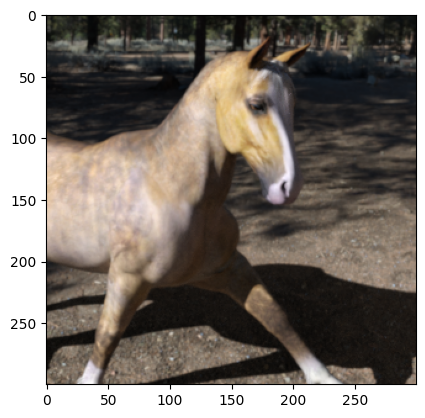

In [21]:
dataset = tfds.load(name='horses_or_humans', split=tfds.Split.TRAIN)

# dict 형식으로 받는 경우 (as_supervised=False)
for data in dataset.take(1):
    plt.imshow(data['image'])
    print(data['label'].numpy())

as_supervised=True 옵션을 주면 dict 형태가 아닌 tuple 형태로 데이터를 return 받습니다.

In [22]:
dataset = tfds.load(name='horses_or_humans', split=tfds.Split.TRAIN, as_supervised=True)

0


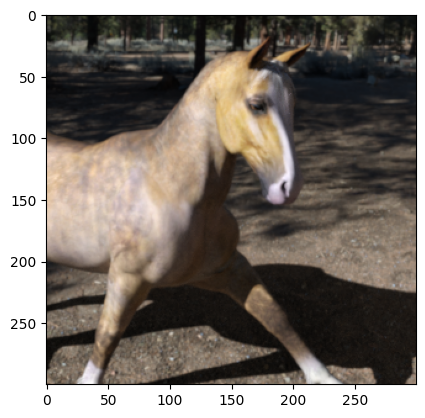

In [23]:
for image, label in dataset.take(1):
    plt.imshow(image)
    print(label.numpy())

#  map (함수를 매핑하기)

In [24]:
dataset_name = 'horses_or_humans'
dataset, info = tfds.load(name=dataset_name, split=tfds.Split.TRAIN, with_info=True)

In [25]:
def normalize(dataset):    
    image, label = tf.cast(dataset['image'], tf.float32) / 255.0, dataset['label']
    return image, label

위에서 만든 normalize 함수를 map할 수 있습니다.

In [29]:
train_dataset = dataset.map(normalize).batch(32)

In [30]:
dataset.map(normalize).batch(32)

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# shuffle
dataset에서 load 할 때 셔플하는 옵션과는 별개로 다시 셔플을 진행할 수 있습니다.

buffer_size 옵션을 반드시 지정해 주어야 합니다.

full shuffle을 위해서는 buffer_size == 전체 이미지 갯수로 정합니다.

In [31]:
dataset.map(normalize).shuffle(buffer_size=1000).batch(32)

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# 시각화
label_map은 단지 시각화에 대한 label을 지정하기 위함

In [32]:
train_dataset = dataset.map(normalize).batch(32)

In [33]:
label_map = {
    0: 'horse',
    1: 'human'
}

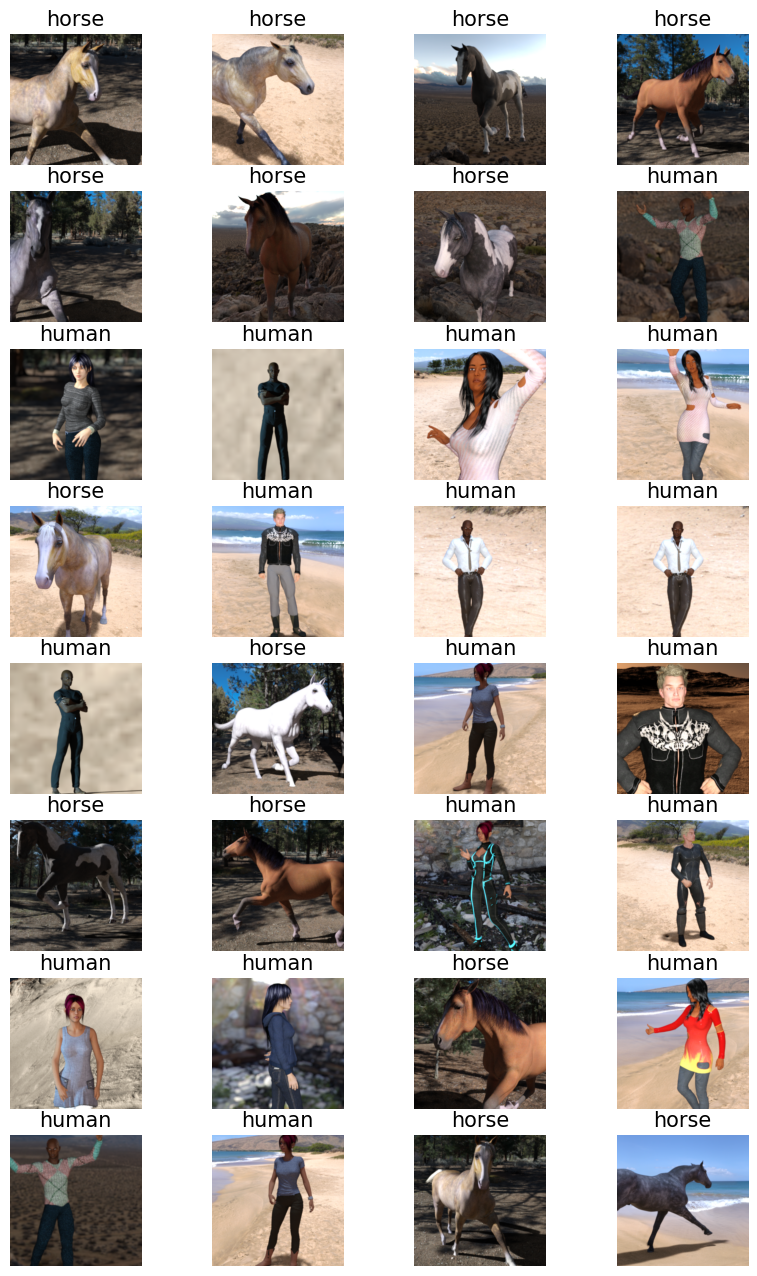

In [34]:
for image, label in train_dataset.take(1):
    fig, axes = plt.subplots(8, 4)
    fig.set_size_inches(10, 16)
    for i in range(32):
        axes[i//4, i%4].imshow(image[i])
        axes[i//4, i%4].axis('off')
        axes[i//4, i%4].set_title(label_map[label[i].numpy()], fontsize=15)
    plt.show()